In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\Dell\Desktop\DBT\tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06-09-2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04-01-2015,2947,7.3,2015,174799923.1,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [6]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
df.drop(['id','imdb_id','homepage','overview'],axis=1,inplace=True)

In [8]:
df['cast'].fillna('missing',inplace=True)
df['director'].fillna('missing',inplace=True)
df['tagline'].fillna('missing',inplace=True)
df['keywords'].fillna('missing',inplace=True)
df['genres'].fillna('missing',inplace=True)
df['production_companies'].fillna('missing',inplace=True)

In [9]:
df['budget']=df['budget'].replace(0,np.NAN)

In [10]:
df['budget'].median()

17000000.0

In [11]:
df.isnull().sum()

popularity                 0
budget                  5696
revenue                    0
original_title             0
cast                       0
director                   0
tagline                    0
keywords                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [12]:
df.duplicated().sum()

1

In [13]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000268C8219390>,
      dtype=object)

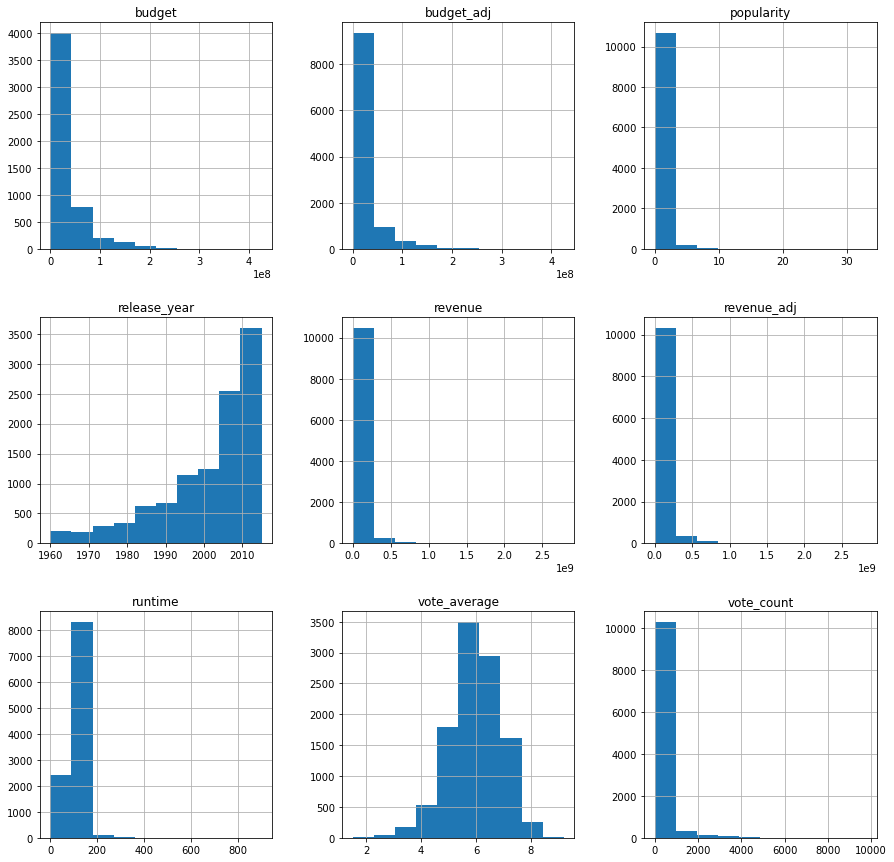

In [14]:
df.hist(figsize=(15,15))

Text(0, 0.5, 'popularity')

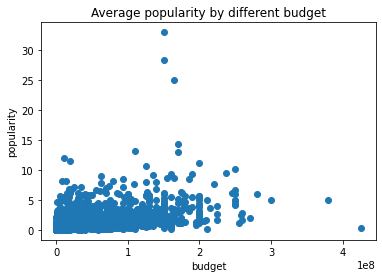

In [15]:
x=df['budget']
y=df['popularity']

plt.scatter(x,y)
plt.title('Average popularity by different budget',fontsize=12)
plt.xlabel('budget',fontsize=10)
plt.ylabel('popularity',fontsize=10)

In [16]:
m=df['budget'].median()
low_budg=df.query('budget<{}'.format(m))
high_budg=df.query('budget>{}'.format(m))

In [17]:
low_budg_mean_pop=low_budg['popularity'].mean()
high_budg_mean_pop=high_budg['popularity'].mean()

Text(0, 0.5, 'Average Popularity')

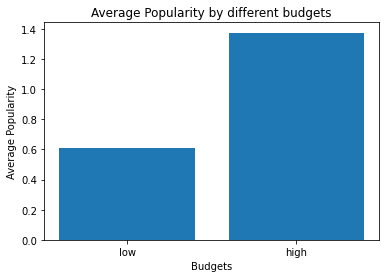

In [18]:
locations=[1,2]
heights=[low_budg_mean_pop,high_budg_mean_pop]
labels=['low','high']
plt.bar(locations,heights,tick_label=labels)
plt.title('Average Popularity by different budgets')
plt.xlabel('Budgets')
plt.ylabel('Average Popularity')

In [19]:
increased_percentage=(high_budg_mean_pop-low_budg_mean_pop)/high_budg_mean_pop *100
increased_percentage

55.90290985347826

In [20]:
short=df.query('runtime<{}'.format(100))
medium=df.query('runtime<{}'.format(200))
long=df.query('runtime>{}'.format(200))

In [21]:
short_mean_popularity=short['popularity'].mean()
medium_mean_popularity=medium['popularity'].mean()
long_mean_popularity=long['popularity'].mean()

Text(0, 0.5, 'Average Popularity')

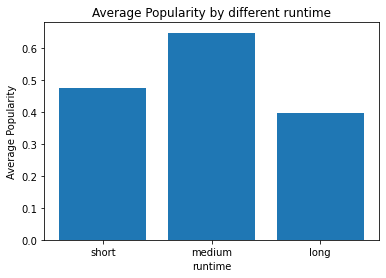

In [22]:
locations=[1,2,3]
heights=[short_mean_popularity,medium_mean_popularity,long_mean_popularity]
labels=['short','medium','long']
plt.bar(locations,heights,tick_label=labels)
plt.title('Average Popularity by different runtime')
plt.xlabel('runtime')
plt.ylabel('Average Popularity')

Text(0, 0.5, 'popularity')

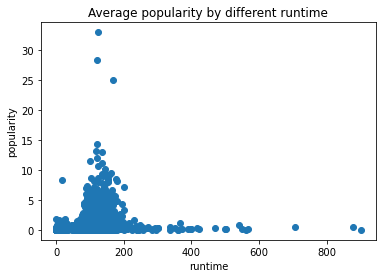

In [23]:
x=df['runtime']
y=df['popularity']

plt.scatter(x,y)
plt.title('Average popularity by different runtime',fontsize=12)
plt.xlabel('runtime',fontsize=10)
plt.ylabel('popularity',fontsize=10)

In [24]:
m_popularity=df['popularity'].median()
lower_popularity=df.query('popularity<{}'.format(m_popularity))
higher_popularity=df.query('popularity>{}'.format(m_popularity))

In [28]:
def extract_data(column_name):
    data=df[column_name].str.cat(sep='|')
    data=pd.Series(data.split('|'))
    count=data.value_counts(ascending=False)
    return count

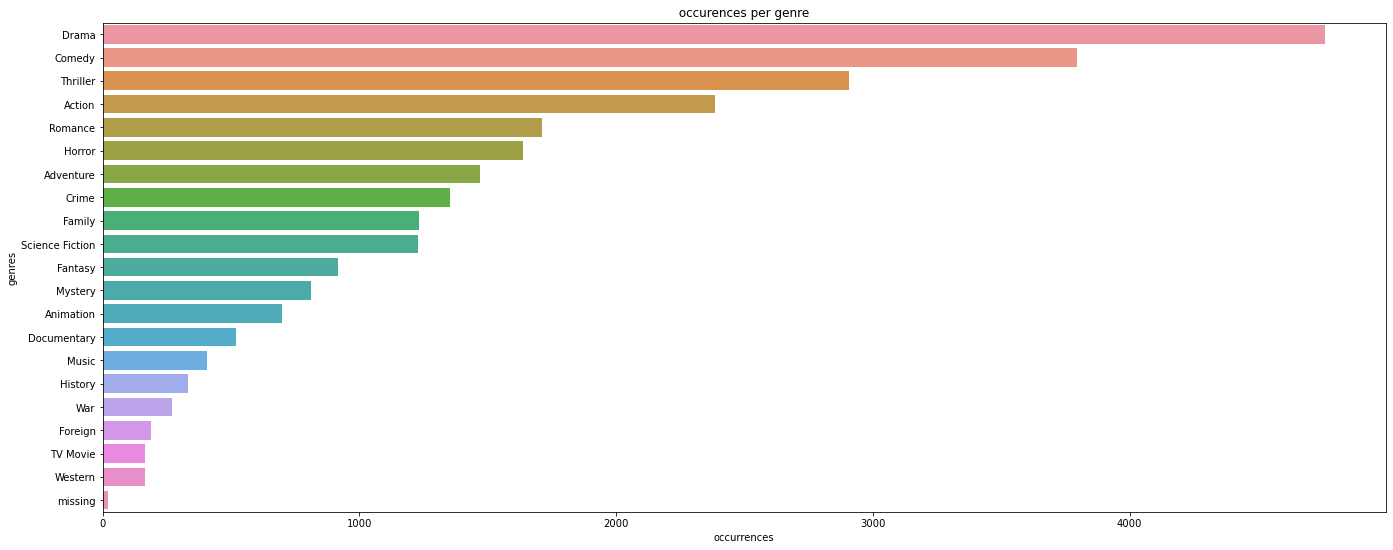

In [29]:
genre_count=extract_data('genres')
df_genre_counts=pd.DataFrame({'genres':genre_count.index,'count':genre_count.values})
f, ax = plt.subplots(figsize=(23, 9))
 
sns.barplot(x = 'count', y = 'genres', data=df_genre_counts) 
ax.set_title(' occurences per genre ')
ax.set_xlabel('occurrences')
ax.set_ylabel('genres')
plt.show()

In [30]:
director_count=extract_data('director')
director_count

Woody Allen         46
missing             44
Clint Eastwood      34
Martin Scorsese     31
Steven Spielberg    30
                    ..
Bruce Pittman        1
Greg Coolidge        1
Richard Brandes      1
Eliot Elisofon       1
Peter Scheerer       1
Length: 5363, dtype: int64

Text(0, 0.5, 'number of movies')

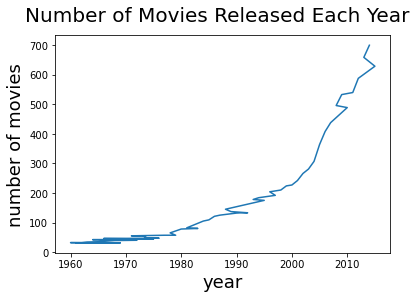

In [33]:
movie_count=df['release_year'].value_counts()
fig=plt.figure()
plt.plot(movie_count)
fig.suptitle('Number of Movies Released Each Year',fontsize=20)
plt.xlabel('year',fontsize=18)
plt.ylabel('number of movies',fontsize=18)